# 4c) Camera calibration
To achieve accurate pose estimation, it's essential to utilize the camera intrinsics. In numerous cases, as the robot navigates through the environment, we gather sufficient data in advance—before the actual localization—to calibrate the camera that captures the query images. 

In [1]:
%load_ext autoreload
%autoreload 2
import random, time
import ipywidgets as widgets
from IPython.display import display
from pathlib import Path
from pprint import pformat
from hloc.utils.camera_calibrator import calibrate_camera
from hloc.visualization import plot_images, read_image
from hloc.extract_features import ImageDataset
from hloc.utils.downloader import *

## Capture images
We will use the OpenCV library to calibrate our camera. For the calibration, we need to capture approximately **10 to 20 images** of the **calibration pattern**. We are going to use a **chessboard printed on A4 paper**. During the hands-on session, I will distribute the patterns to you. If you are running the experiments alone, you can download one from the web page: https://markhedleyjones.com/projects/calibration-checkerboard-collection

## Upload images
Upload the images using the "Upload" button and store it by "Save Image(s)". For some memmory reasons the uploading may fail if you upload 2 and more images. For that reason, we may need to upload the images manually by some file manager, e.g., WinSCP. Use 147.32.71.80 IP and port 22, the username and password you get during the hands on session.

In [2]:
images_dir = Path('/data/camera_calibration/images')
images_dir.mkdir(exist_ok=True, parents=True)

uploader = widgets.FileUpload(
    accept='image/*',  # Accept only images
    multiple=True  # Allow single file upload
)

def on_save_button_clicked(change):
    save_uploaded_file(uploader.value, images_dir)

save_button = widgets.Button(description="Save Image(s)")
save_button.on_click(on_save_button_clicked)
display(uploader, save_button)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Button(description='Save Image(s)', style=ButtonStyle())

After uploading and saving the images, try to show them, i.e., verify that they are ready camera calibration. 

[2024/02/09 13:11:14 hloc INFO] Found 13 images in root /data/camera_calibration/images.


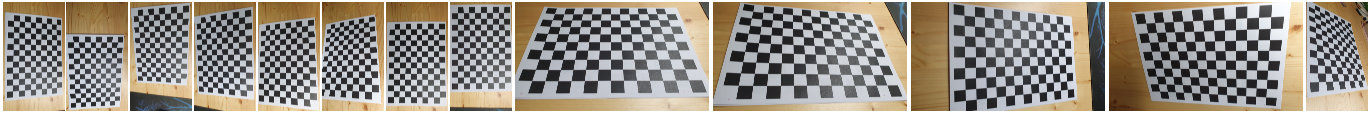

In [3]:
images = ImageDataset(images_dir, {"preprocessing":None}, None)
plot_images([read_image(images_dir / r) for r in images.names], dpi=25)

## OpenCV Calibration
Once the images are uploaded, we need to set the parameters of the chessboard, i.e., the dimensions of one square in millimeters and the number of rows and columns.

In [4]:
rows = 9  # Number of inner corners per row
cols = 13  # Number of inner corners per column
square_edge_length = 20.0  # in millimeters

In [5]:
result = calibrate_camera(images_dir, rows, cols, square_edge_length)
focal_length, principal_point, radial_distortion, (width, height) = result

Error in projection : 
 12.709882977816587

Camera matrix : 
 [[3.87323750e+03 0.00000000e+00 1.15867385e+03]
 [0.00000000e+00 3.95291264e+03 9.45073820e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion coefficients : 
 [[-0.55253668  1.06603253 -0.01152118 -0.0071583  -0.79564096]]


In [ ]:
# OPENCV width height fx, fy, cx, cy, k1, k2, p1, p2
print(f"OPENCV {width} {height} {focal_length[0]} {focal_length[1]} "+\
     f"{principal_point[0]} {principal_point[1]} {radial_distortion[0]} "+\
     f"{radial_distortion[1]} {radial_distortion[2]} {radial_distortion[3]}")